In [1]:
# !source venv/bin/activate

In [2]:
# !pip install watermark

In [3]:
# %load_ext watermark
# %watermark -v -p numpy,torch

# Book 1: D2DL

# 2 Preliminaries

## 2.1 Data Manipulation

### 2.1.1 Getting Started

In [4]:
import torch as q

In [5]:
x = q.arange(12, dtype = q.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [6]:
x.numel()
# total number of elements in a tensor

12

In [7]:
x.shape
# shape = length along each axis

torch.Size([12])

In [8]:
X = x.reshape(3,4)
X
# reshaped in a 3 x 4 matrix, 3 rows 4 columns

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [9]:
q.zeros((3, 3, 1))

tensor([[[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]]])

In [10]:
q.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [11]:
q.randn(1,4) #gaussian with mean 0 and std deviation 1

tensor([[0.9941, 0.0710, 0.1185, 0.9107]])

In [12]:
q.tensor([
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12]
]) #tensor construction

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

### 2.1.2 Indexing and Slicing 

In [13]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [14]:
X[1,2] = 99
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 99.,  7.],
        [ 8.,  9., 10., 11.]])

### 2.1.3 Operations 

In [15]:
q.exp(x)

tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
               inf, 1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04])

In [16]:
x = q.tensor([1.0, 2, 4,8])
y = q.tensor([2,2,2,2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [17]:
X = q.arange(12, dtype=q.float32).reshape(3,4)
Y = q.tensor([
    [2.0, 1, 4, 3],
    [1, 2, 3,4],
    [4, 3, 2,1]
])
q.cat((X, Y), dim = 0), q.cat((X,Y), dim=1)
# concatenate tensors, dim 0 is vertically/rows, dim1 is horizontally/columns

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [18]:
X == Y
# logical truth values, binary tensor

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [19]:
X.sum()

tensor(66.)

### 2.1.4 Broadcasting 
Broadcasting works according to the following two-step procedure: (i) expand one or both arrays by copying elements along axes with length 1 so that after this transformation, the two tensors have the same shape; (ii) perform an elementwise operation on the resulting arrays.

In [20]:
a = q.arange(3).reshape((3, 1))
b = q.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [21]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.5 Saving memory 

In [22]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [23]:
Z = q.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140438868909744
id(Z): 140438868909744


In [24]:
before = id(X)
X += Y
id(X) == before

True

### 2.1.6 Conversion to Other Python Objects 

In [25]:
A = X.numpy()
B = q.from_numpy(A)
type(A), type(B) 
# transform ndarray to tensor is A to B,
# and tensor to ndarray is X to A

(numpy.ndarray, torch.Tensor)

## 2.2 Data Preprocessing 

In [26]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [27]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### 2.2.2 Data Preparation
Imputation replaces missing values with estimates of their values while Deletion simply discards those rows or those coumns that contain missing values.

In [28]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na = True)
inputs

,NumRooms,RoofType_Slate,RoofType_nan
0,NaN,False,True
1,2.0,False,True
2,4.0,True,False
3,NaN,False,True


In [29]:
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,RoofType_Slate,RoofType_nan
0,3.0,False,True
1,2.0,False,True
2,4.0,True,False
3,3.0,False,True


### 2.2.3 Conversion to Tensor Format 

In [30]:
X = q.tensor(inputs.to_numpy(dtype=int))
y = q.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3, 0, 1],
         [2, 0, 1],
         [4, 1, 0],
         [3, 0, 1]]),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.3 Linear Algebra

### 2.3.1 Scalars

In [31]:
x = q.tensor(3.0)
y = q.tensor(2)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2 Vectors

In [32]:
x = q.arange(3)
x # 1st order tensors

tensor([0, 1, 2])

In [33]:
x[2]

tensor(2)

In [34]:
len(x)

3

In [35]:
x.shape
# order is the number of axes
# dimensionality is the number of components

torch.Size([3])

### 2.3.3 Matrices
2nd order tensors (scalars are 0th order)

In [36]:
A = q.arange(6).reshape(3,2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [37]:
A.T # Transpose is just T lol

tensor([[0, 2, 4],
        [1, 3, 5]])

In [38]:
B = q.tensor([
    [1,2,3],
    [2,0,4],
    [3,4,5]
])
B == B.T # symmetric matrix

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4 Tensors 

In [39]:
q.arange(24).reshape(2,3,4) 
# imagine a third axes of 2 images each of 3 rows and 4 columns

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5 Basic properties of Tensor Arithmetic 

In [40]:
A = q.arange(6, dtype=q.float32).reshape(2,3)
B = A.clone() # assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [41]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [42]:
a = 2
X = q.arange(24).reshape(2,3,4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6 Reduction 
Sum of a tensor's elements

In [43]:
x = q.arange(3, dtype=q.float32)
x, x.sum() # just for a vector

(tensor([0., 1., 2.]), tensor(3.))

In [44]:
A.shape, A.sum() # adds all elements in A

(torch.Size([2, 3]), tensor(15.))

In [45]:
A.sum(axis=0), A.sum(axis=0).shape # sums down the column, reducing it

(tensor([3., 5., 7.]), torch.Size([3]))

In [46]:
A.sum(axis=1), A.sum(axis=1).shape # sums right of the row, reducing it

(tensor([ 3., 12.]), torch.Size([2]))

In [47]:
A.sum(axis=[0, 1]) == A.sum()  # same as A.sum()

tensor(True)

In [48]:
A.mean(), A.sum() / A.numel() # numel is number of elements

(tensor(2.5000), tensor(2.5000))

In [49]:
A.mean(axis = 0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

### 2.3.7 Non-Reduction Sum
To keep the number of axes unchanges after sum or mean, useful for broadcasting

In [50]:
sum_A = A.sum(axis=1, keepdims = True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [51]:
A, A / sum_A # each row sums to 1

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[0.0000, 0.3333, 0.6667],
         [0.2500, 0.3333, 0.4167]]))

In [52]:
A.cumsum(axis=0) # cumulative sum down the column 0+3 = 3, 1+4 = 5, 2+5 = 7

tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [53]:
A.cumsum(axis=1) # cumulative sum along the row
# 0+3 = 3, 3+4 = 7, 7+5 = 12

tensor([[ 0.,  1.,  3.],
        [ 3.,  7., 12.]])

### 2.3.8 Dot Product

In [54]:
y = q.ones(3, dtype = q.float32)
x, y, q.dot(x,y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [55]:
q.sum(x*y)

tensor(3.)

### 2.3.9 Matrix Vector Product 

In [56]:
A.shape, x.shape, q.mv(A, x), A@x
# A@x maps to torch.matmul(A, B)

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

### 2.3.10 Matrix Matrix Multiplication 

In [57]:
B = q.ones(3,4)
q.mm(A,B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### 2.3.11  Norms
Maps a vector to a scalar, ex l2 norm is the Euclidean length of a vector

In [58]:
u = q.tensor([3.0, -4])
q.norm(u)

tensor(5.)

In [59]:
q.abs(u), q.abs(u).sum() # manhattan distance

(tensor([3., 4.]), tensor(7.))

In [60]:
q.norm(q.ones((4, 9))) # frobenius norm

tensor(6.)

### Exercises 

6. Run A / A.sum(axis=1) and see what happens. Can you analyze the results?

In [61]:
C = q.tensor([
    [1,2],
    [3,3]
])
C, C.sum(axis=1), C/C.sum(axis=1)

(tensor([[1, 2],
         [3, 3]]),
 tensor([3, 6]),
 tensor([[0.3333, 0.3333],
         [1.0000, 0.5000]]))

9. Feed a tensor with three or more axes to the linalg.norm function and observe its output. What does this function compute for tensors of arbitrary shape?

In [62]:
D = q.ones(2,2,4)
D, q.norm(D)

(tensor([[[1., 1., 1., 1.],
          [1., 1., 1., 1.]],
 
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.]]]),
 tensor(4.))

## Calculus

In [63]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from matplotlib import pyplot as plt

### 2.4.1 Derivatives and Differentiation 

In [64]:
def f(x) :
    return 3*x**2 - 4*x

In [65]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


### 2.4.2 Visualisation Utilities 

In [66]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [67]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [68]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [69]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

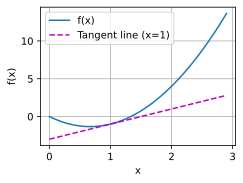

In [70]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### 2.4.3 Partial Derivatives and Gradients 

### 2.4.4 Chain Rule

## Automatic Differentiation 

### 2.5.1 A Simple Function 

In [71]:
x = q.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [72]:
x.requires_grad = True # or add this during initialisation
x.grad # none by default

In [73]:
z = 2 * q.dot(x, x) # fx = 2x^2, f'x = 4x
z # 2 * (0 + 1 + 4 + 9)

tensor(28., grad_fn=<MulBackward0>)

In [74]:
z.backward(retain_graph=True) 
# computes the gradient of current tensor wrt graph leaves
# done with chain rule, gradients are accumulated in the leaves

In [75]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [76]:
4*x == x.grad

tensor([True, True, True, True])

In [77]:
x.grad.zero_()  # reset the gradient else the new gradient is added to the currently stored one
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2 Backward for Non-Scalar variables

In [78]:
x.grad.zero_()
del y
y = x * x # f'x becomes 2x
y.backward(gradient = q.ones(len(y)), retain_graph=True)
# faster method is y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [79]:
y.sum(), y.sum().backward(retain_graph=True)
# ??

(tensor(14., grad_fn=<SumBackward0>), None)

### 2.5.3 Detaching Computation 
In the below case, u's provenance (how it was created) is wiped out. u has no ancestors in the graph and the gradients do not flow through u to x. 

In [82]:
x.grad.zero_()
y = x*x
u = y.detach()
z = u * x

z.sum().backward(retain_graph=True)
x.grad == u

tensor([True, True, True, True])

In [83]:
x.grad.zero_()
y.sum().backward(retain_graph=True)
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4 Gradients and Python control flow 

In [84]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [104]:
a = q.randn(size=(), requires_grad=True)
d = f(a)
d.backward(retain_graph=True)
a, d

(tensor(0.3864, requires_grad=True), tensor(1582.8097, grad_fn=<MulBackward0>))

In [108]:
a.grad == d / a, a.grad

(tensor(True), tensor(4096.))